In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPEN_WEATHERMAP_API_KEY")

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold response info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [17.54, 15.93, 14.1, 29.94, 26.99, 25.26, 25.09, 22.99, 33.62, 30.96]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,17.54
1,London,51.5085,15.93
2,Oslo,59.9127,14.10
3,Beijing,39.9075,29.94
4,Mumbai,19.0144,26.99
5,Manila,14.6042,25.26
6,New York,40.7143,25.09
7,Seattle,47.6062,22.99
8,Dallas,32.7668,33.62
9,Taipei,25.0478,30.96


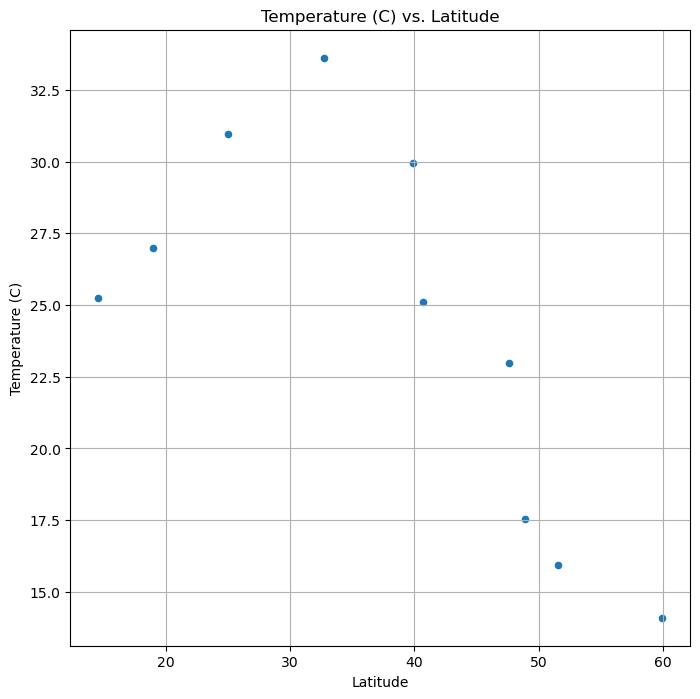

In [6]:
# Create a Scatter Plot for temperature vs latitude
scatter_plot = weather_data.plot(kind="scatter", x="lat", y="temp", grid=True, figsize=(8,8), title="Temperature (C) vs. Latitude")
scatter_plot.set_ylabel("Temperature (C)")
scatter_plot.set_xlabel("Latitude")
plt.show()

In [8]:
# Perform a linear regression on temperature vs. latitude
liner_regression = stats.linregress(weather_data["lat"], weather_data["temp"])
liner_regression

# Get regression values
regression_values = weather_data["lat"] * liner_regression[0] + liner_regression[1]
print(regression_values)

0    20.862760
1    20.036575
2    17.421448
3    23.646447
4    30.147734
5    31.520051
6    23.395396
7    21.250850
8    25.868412
9    28.270326
Name: lat, dtype: float64


In [9]:
# Create line equation string
line_eq_pridicted_y = "y = " + str(round(liner_regression[0],2)) + "x + " + str(round(liner_regression[1],2))
print(line_eq_pridicted_y)

y = -0.31x + 36.06


The r-squared is: -0.6993698961206486


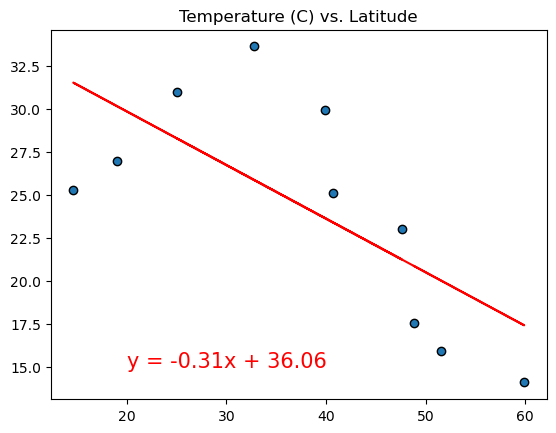

In [11]:
# Create Plot
plt.scatter(weather_data["lat"], weather_data["temp"], edgecolors="black")

# Label plot and annotate the line equation
plt.title("Temperature (C) vs. Latitude")
plt.plot(weather_data["lat"], regression_values, color='red')
plt.annotate(line_eq_pridicted_y,(20,15),fontsize=15,color="red")


# Print r^2 value
print(f"The r-squared is: {liner_regression[2]}")


# Show plot
plt.show()

In [9]:
# Calculate the temperature for Florence at 43.77 degrees


The Predicted temperature for Florence will be 21.05.


In [10]:
# Use API to determine actual temperature


The actual temperature of Florence is 22.66
